In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [4]:
len(df)

1599999

In [5]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df.columns = ['class','id','date','no_query','user','tweet']

In [7]:
df.head()

,class,id,date,no_query,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df = df.drop('no_query', axis=1)

In [9]:
df.head()

,class,id,date,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [10]:
# EDA

<AxesSubplot:xlabel='class', ylabel='count'>

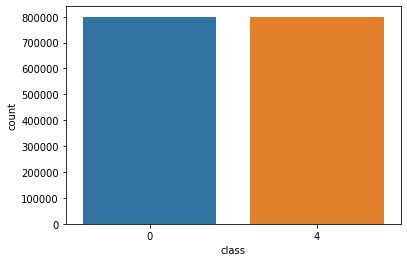

In [11]:
sns.countplot(data=df, x='class')

In [12]:
df['class'].value_counts()

4    800000
0    799999
Name: class, dtype: int64

In [13]:
# FEATURE AND LABEL
X = df['tweet']
y = df['class']

In [14]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [19]:
X_train_transform = tfidf.transform(X_train)
X_test_transform = tfidf.transform(X_test)

In [20]:
# MODEL

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_transform, y_train)

MultinomialNB()

In [22]:
from sklearn.metrics import plot_confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.75      0.79      0.77    159494
           4       0.78      0.73      0.75    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



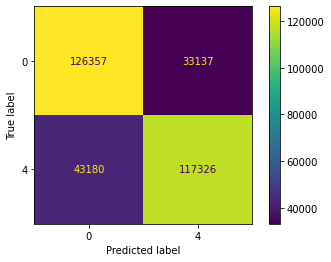

In [23]:
nb_pred = nb.predict(X_test_transform)
print(classification_report(y_test,nb_pred))
plot_confusion_matrix(nb, X_test_transform, y_test)

In [24]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_transform, y_train)

LinearSVC()

              precision    recall  f1-score   support

           0       0.78      0.76      0.77    159494
           4       0.77      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



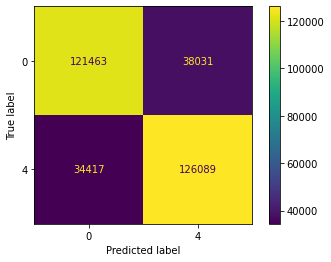

In [25]:
svc_pred = svc.predict(X_test_transform)
print(classification_report(y_test,svc_pred))
plot_confusion_matrix(svc, X_test_transform, y_test)

In [26]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train_transform, y_train)

C:\Users\david\Anaconda3\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           4       0.77      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



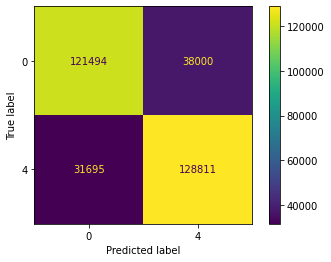

In [27]:
logRegressPredict = logisticRegression.predict(X_test_transform)
print(classification_report(y_test,logRegressPredict))
plot_confusion_matrix(logisticRegression, X_test_transform, y_test)

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
Final = Pipeline([('tfidf', TfidfVectorizer()), ('logisticRegression',LogisticRegression())])

In [32]:
Final.fit(df['tweet'],df['class'])

C:\Users\david\Anaconda3\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logisticRegression', LogisticRegression())])

In [44]:
Final.predict(['i hate you'])

array([0], dtype=int64)

In [45]:
Final.predict(['i used to like you but not anymore'])

array([0], dtype=int64)

In [35]:
Final.predict(['I hate you, but I love you'])

array([0], dtype=int64)

In [36]:
Final.predict(['i love you but i hate you'])

array([0], dtype=int64)

In [37]:
Final.predict(['i love you'])

array([4], dtype=int64)

In [38]:
Final.predict(['i compliment you because you are good at singing'])

array([4], dtype=int64)

In [41]:
Final.predict(['donald trump'])

array([4], dtype=int64)

In [42]:
Final.predict(['It felt so good to be home.'])

array([4], dtype=int64)

In [43]:
Final.predict(['Why would a good looking wealthy man move to the country, become a veterinarian and marry a country hick?'])

array([4], dtype=int64)

In [46]:
Final.predict(['do you think that you good?'])

array([4], dtype=int64)

In [47]:
Final.predict(['you are so bad brooo'])

array([0], dtype=int64)

In [48]:
import pickle

In [49]:
pickle.dump(Final,open('tweetpredict.pkl','wb'))